In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
cervejas_df = pd.read_csv("base.csv_")
print(cervejas_df.head(5))
print(f"total de linhas {len(cervejas_df)}")

    id         name   abv   ibu  target_fg  target_og    ebc   srm   ph
0    9        AB:07  12.5  30.0     1020.0     1106.0   84.0  42.0  5.6
1  120        AB:10  11.5  80.0     1020.0     1096.0  115.0  57.5  4.4
2  245      Beatnik   8.0  60.0     1013.0     1075.0   60.0  30.5  5.2
3  294  Opaque Jake   7.2  20.0     1009.0     1065.0   20.0  10.0  4.4
4  103   Clown King  12.0  85.0     1020.0     1130.0   24.0  12.0  4.4
total de linhas 3600


In [6]:
# Limpando a base
cervejas_df = pd.read_csv("base.csv_")
print(cervejas_df.head(5))
print(f"total de linhas {len(cervejas_df)}")
cervejas_df = cervejas_df.drop_duplicates(subset=['id'])
cervejas_df = cervejas_df.dropna()
cervejas_df = cervejas_df.sort_values(by=['name'])                                                                                                                               
print(f"total de linhas {len(cervejas_df)}")
print(cervejas_df.head(5))
print(f'tipo das variaveis \n {(cervejas_df.dtypes)}')
cervejas_df = cervejas_df[['abv', 'ibu', 'target_fg', 'target_og', 'ebc', 'srm', 'ph']]*10
cervejas_df= cervejas_df[list(['abv', 'ibu', 'target_fg', 'target_og', 'ebc', 'srm', 'ph'])].astype(int)

    id         name   abv   ibu  target_fg  target_og    ebc   srm   ph
0    9        AB:07  12.5  30.0     1020.0     1106.0   84.0  42.0  5.6
1  120        AB:10  11.5  80.0     1020.0     1096.0  115.0  57.5  4.4
2  245      Beatnik   8.0  60.0     1013.0     1075.0   60.0  30.5  5.2
3  294  Opaque Jake   7.2  20.0     1009.0     1065.0   20.0  10.0  4.4
4  103   Clown King  12.0  85.0     1020.0     1130.0   24.0  12.0  4.4
total de linhas 3600
total de linhas 315
      id           name   abv    ibu  target_fg  target_og    ebc   srm   ph
782   76  #Mashtag 2013   7.5   50.0     1013.0     1070.0   40.0  20.0  4.4
223  136  #Mashtag 2014   9.0   50.0     1015.0     1084.0   20.0  10.0  4.4
204   90  #Mashtag 2015  10.0   85.0     1020.0     1098.0  130.0  65.0  4.4
37   239  #Mashtag 2016  10.5  100.0     1010.0     1090.0   15.0   8.0  4.4
766   29  10 Heads High   7.8   70.0     1015.0     1074.0   90.0  45.0  4.4
tipo das variaveis 
 id             int64
name          object
ab

In [7]:

X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

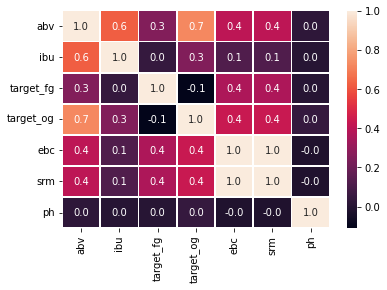

In [ ]:

correlation = cervejas_df.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [8]:

X = cervejas_df[['abv']]
y = cervejas_df[['ibu']]
X_sm = sm.add_constant(X)
results = sm.OLS(y, X_sm).fit()

# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)
X_sm = sm.add_constant(X)
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)
print(f'resultado modelo: {results.summary()} e resultado previsao: {results.predict(X_sm)}')

resultado modelo:                             OLS Regression Results                            
Dep. Variable:                    ibu   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.21e-35
Time:                        13:18:37   Log-Likelihood:                -2520.9
No. Observations:                 315   AIC:                             5046.
Df Residuals:                     313   BIC:                             5053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -501.7188     91.142  